In [38]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('data/electoral-democracy-index.csv')
display(df)

,Entity,Code,Year,"Electoral democracy index (best estimate, aggregate: average)"
0,Afghanistan,AFG,1789,0.020
1,Afghanistan,AFG,1790,0.020
2,Afghanistan,AFG,1791,0.020
3,Afghanistan,AFG,1792,0.020
4,Afghanistan,AFG,1793,0.020
...,...,...,...,...
33019,Zimbabwe,ZWE,2020,0.294
33020,Zimbabwe,ZWE,2021,0.289
33021,Zimbabwe,ZWE,2022,0.286
33022,Zimbabwe,ZWE,2023,0.291


In [39]:
df_filtered = df[df['Year'] >= 1900]
display(df_filtered.head())

,Entity,Code,Year,"Electoral democracy index (best estimate, aggregate: average)"
111,Afghanistan,AFG,1900,0.019
112,Afghanistan,AFG,1901,0.019
113,Afghanistan,AFG,1902,0.022
114,Afghanistan,AFG,1903,0.022
115,Afghanistan,AFG,1904,0.022


In [40]:
unique_entities = df_filtered['Entity'].unique()
regions = ['Europe', 'North America', 'South America', 'Asia', 'Africa', 'Oceania', 'World']
print(regions)

['Europe', 'North America', 'South America', 'Asia', 'Africa', 'Oceania', 'World']


In [41]:
# Create separate dataframe for regions
df_regions = df_filtered[df_filtered['Entity'].isin(regions)]
df_countries = df_filtered[~df_filtered['Entity'].isin(regions)]

# Determine the most recent year
most_recent_year = df_filtered['Year'].max()

# Create a dataframe for all countries in the most recent year
df_countries_recent = df_countries[df_countries['Year'] == most_recent_year]
df_countries_recent = df_countries_recent.sort_values(by='Electoral democracy index (best estimate, aggregate: average)', ascending=True)

# Create a dataframe for all regions in the most recent year
df_regions_recent = df_regions[df_regions['Year'] == most_recent_year]
df_regions_recent = df_regions_recent.sort_values(by='Electoral democracy index (best estimate, aggregate: average)', ascending=True)
print(df_countries_recent.shape)
df_countries_recent.head()  


(179, 4)


,Entity,Code,Year,"Electoral democracy index (best estimate, aggregate: average)"
25002,Saudi Arabia,SAU,2024,0.015
9036,Eritrea,ERI,2024,0.068
5828,China,CHN,2024,0.073
235,Afghanistan,AFG,2024,0.081
19746,Myanmar,MMR,2024,0.083


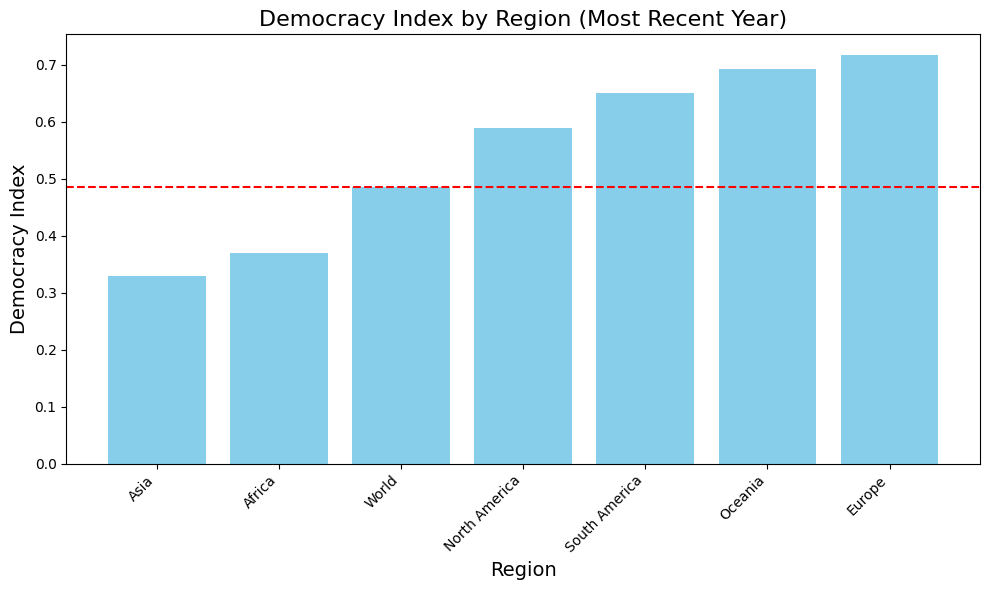

In [42]:
# Extract the most recent year data for regions

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_regions_recent['Entity'], df_regions_recent['Electoral democracy index (best estimate, aggregate: average)'], color='skyblue')
plt.axhline(y=df_regions_recent[df_regions_recent['Entity'] == 'World']['Electoral democracy index (best estimate, aggregate: average)'].values[0], color='red', linestyle='--', linewidth=1.5)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Democracy Index', fontsize=14)
plt.title('Democracy Index by Region (Most Recent Year)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as a PNG file with a transparent background
plt.savefig('images/democracy_index_by_region.png', transparent=True)
plt.show()

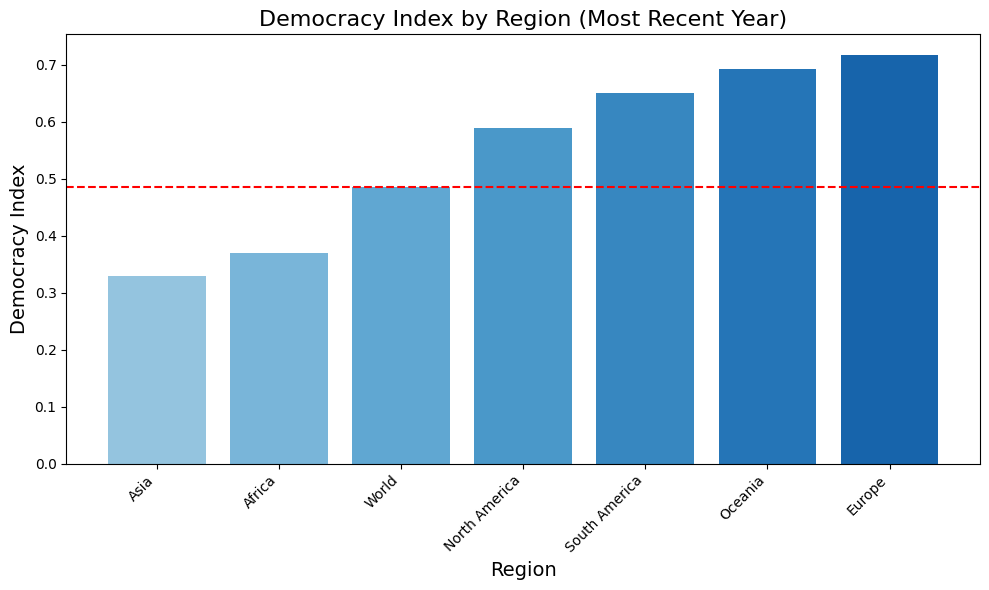

In [43]:
import numpy as np

# Extract the most recent year data for regions

# Plot the bar chart
# Assign different colors to each bar
import matplotlib.cm as cm

# Generate a range of blues using a colormap
colors = cm.Blues(np.linspace(0.4, 0.8, len(df_regions_recent)))

plt.figure(figsize=(10, 6))
plt.bar(df_regions_recent['Entity'], df_regions_recent['Electoral democracy index (best estimate, aggregate: average)'], color=colors)
plt.axhline(y=df_regions_recent[df_regions_recent['Entity'] == 'World']['Electoral democracy index (best estimate, aggregate: average)'].values[0], color='red', linestyle='--', linewidth=1.5)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Democracy Index', fontsize=14)
plt.title('Democracy Index by Region (Most Recent Year)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as a PNG file with a transparent background
plt.savefig('images/democracy_index_by_region_coloured.png', transparent=True)
plt.show()

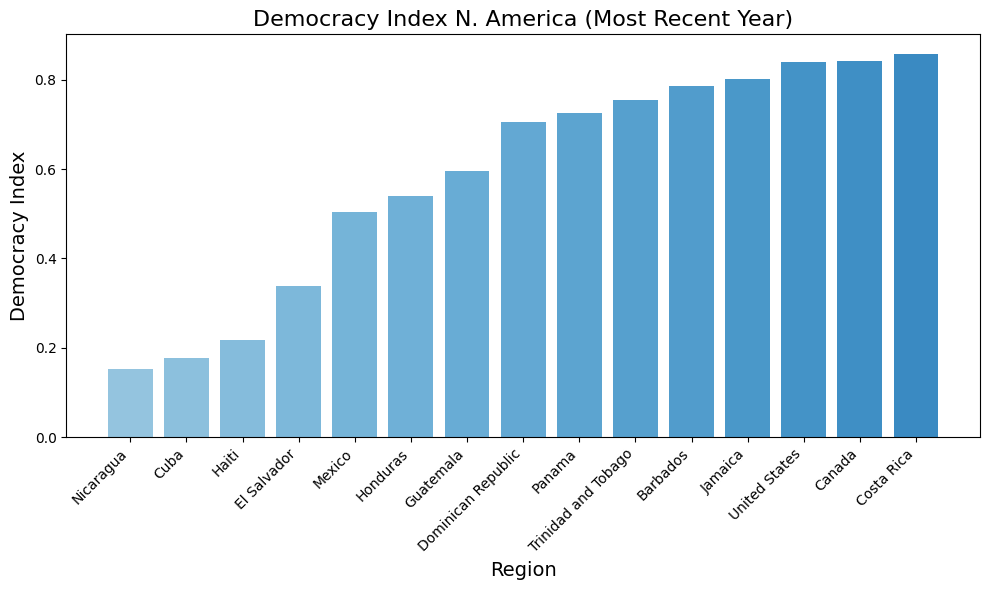

In [44]:
north_american_countries = [
    "Antigua and Barbuda",
    "Bahamas",
    "Barbados",
    "Belize",
    "Canada",
    "Costa Rica",
    "Cuba",
    "Dominica",
    "Dominican Republic",
    "El Salvador",
    "Grenada",
    "Guatemala",
    "Haiti",
    "Honduras",
    "Jamaica",
    "Mexico",
    "Nicaragua",
    "Panama",
    "Saint Kitts and Nevis",
    "Saint Lucia",
    "Saint Vincent and the Grenadines",
    "Trinidad and Tobago",
    "United States"
]

df_n_america = df[df['Entity'].isin(north_american_countries)]
df_n_america_recent = df_n_america[df_n_america['Year'] == most_recent_year]
df_n_america_recent = df_n_america_recent.sort_values(by='Electoral democracy index (best estimate, aggregate: average)', ascending=True)


import numpy as np

# Extract the most recent year data for regions

# Plot the bar chart
# Assign different colors to each bar
import matplotlib.cm as cm

# Generate a range of blues using a colormap
colors = cm.Blues(np.linspace(0.4, 0.8, len(north_american_countries)))

plt.figure(figsize=(10, 6))
plt.bar(df_n_america_recent['Entity'], df_n_america_recent['Electoral democracy index (best estimate, aggregate: average)'], color=colors)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Democracy Index', fontsize=14)
plt.title('Democracy Index N. America (Most Recent Year)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as a PNG file with a transparent background
plt.savefig('images/democracy_index_n_america_coloured.png', transparent=True)
plt.show()

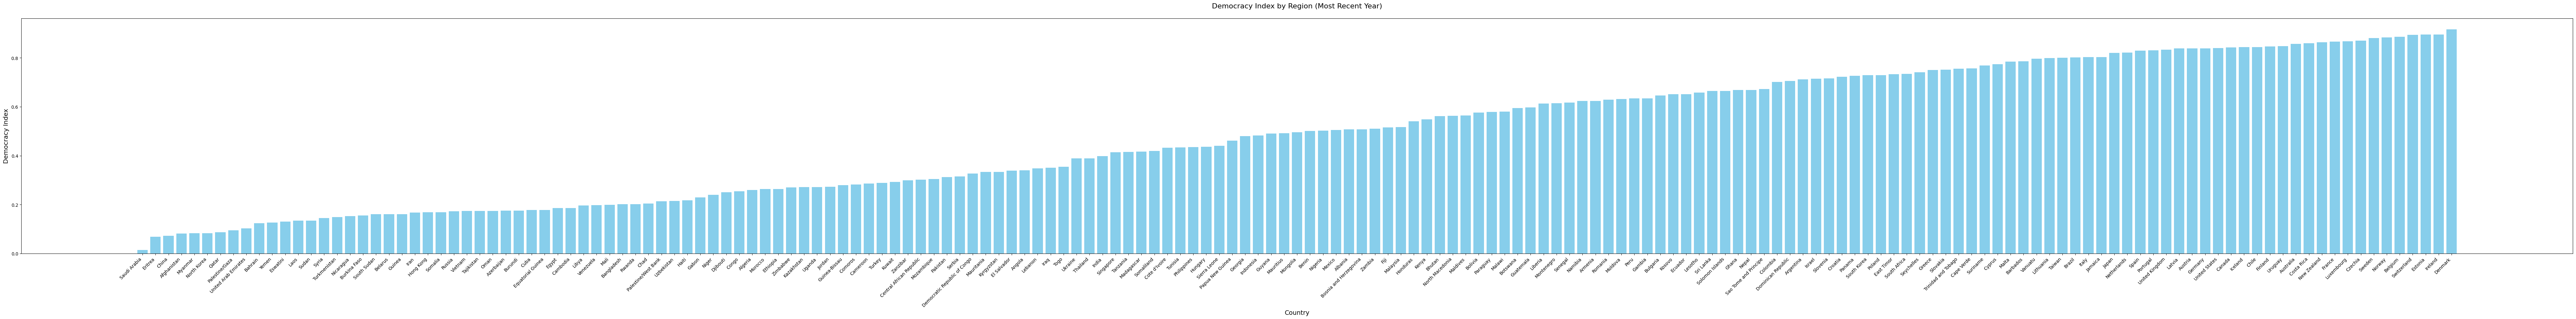

In [45]:
# Plot the bar chart - it's pretty much unreadable because there are just too many countries
plt.figure(figsize=(80, 10))
plt.bar(df_countries_recent['Entity'], df_countries_recent['Electoral democracy index (best estimate, aggregate: average)'], color='skyblue')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Democracy Index', fontsize=14)
plt.title('Democracy Index by Region (Most Recent Year)\n', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as a PNG file with a transparent background
plt.savefig('images/democracy_index_by_country.png', transparent=True)
plt.show()

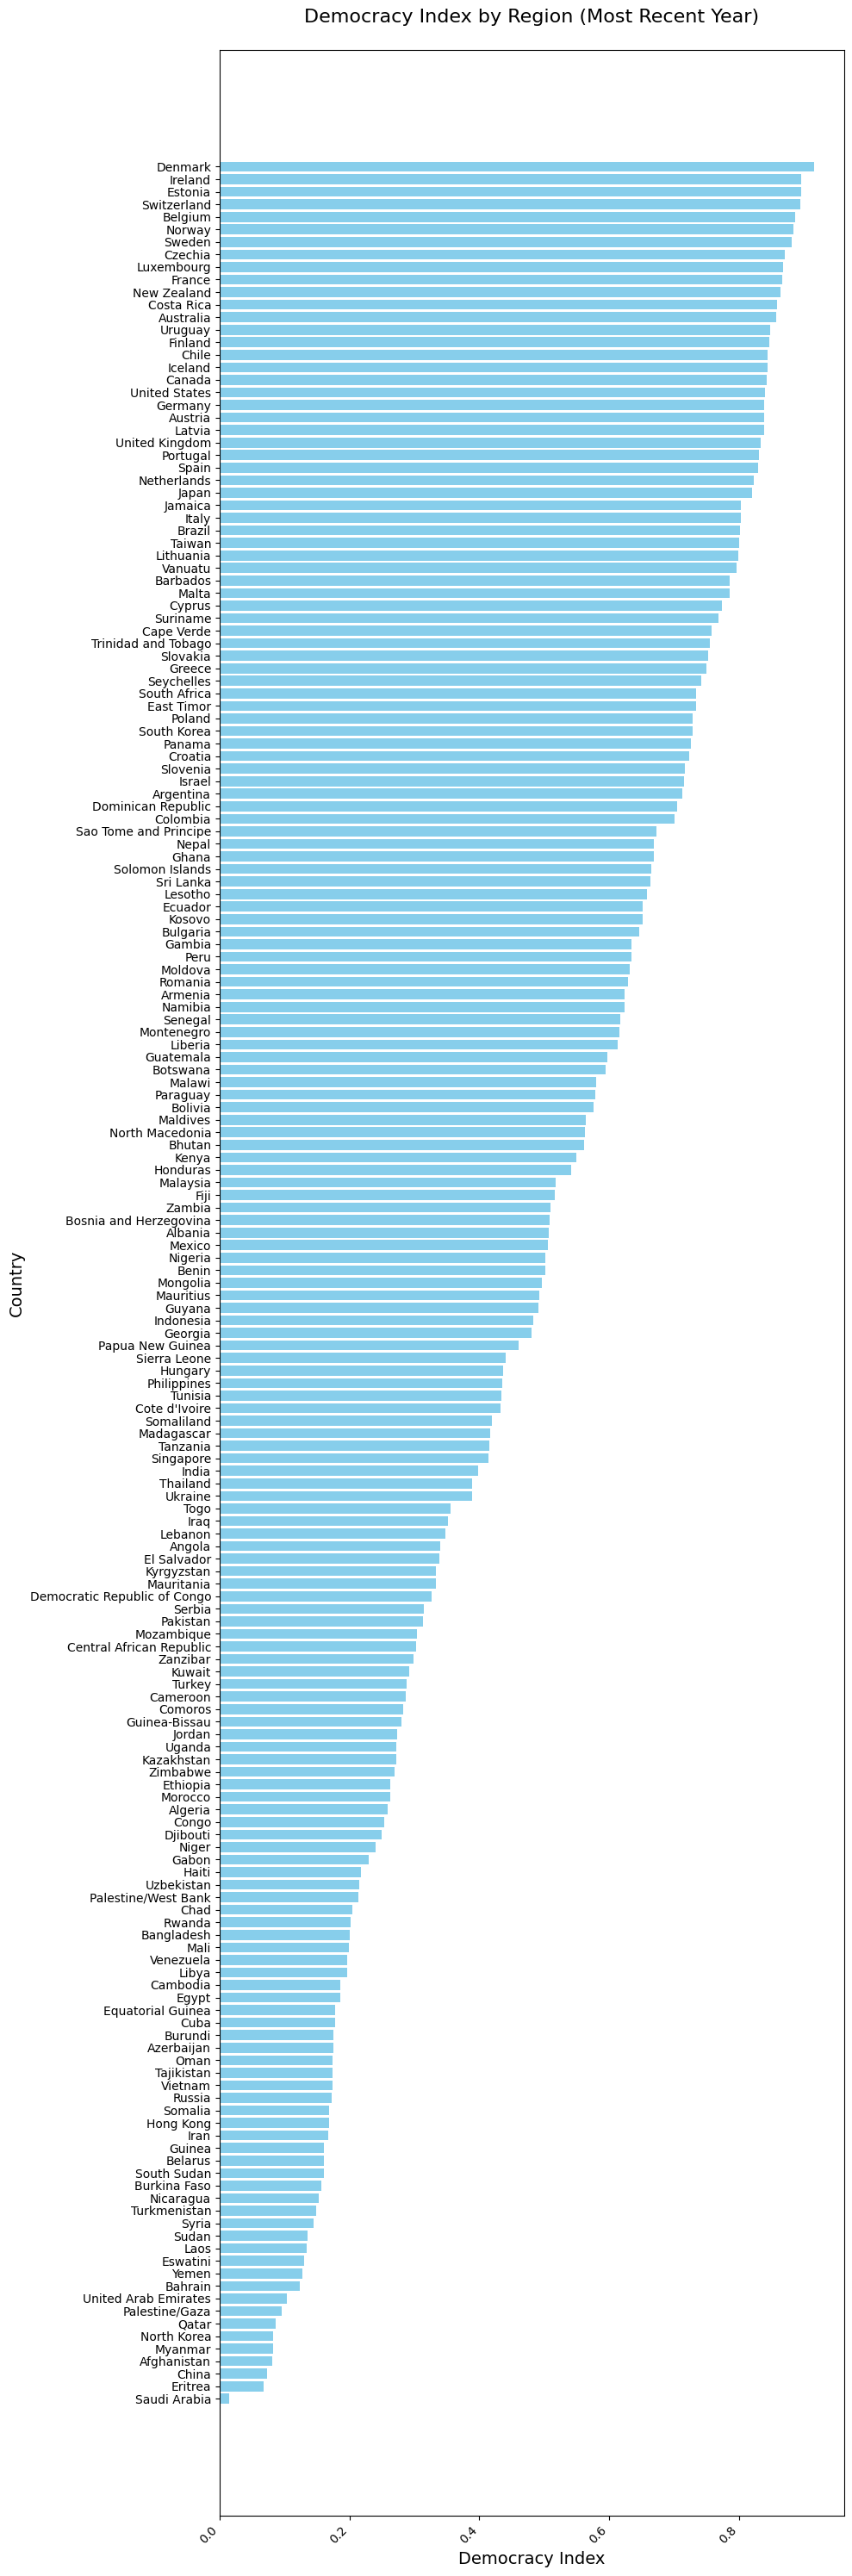

In [46]:
# Plot the bar chart - it's pretty much unreadable because there are just too many countries
plt.figure(figsize=(10, 30))
plt.barh(df_countries_recent['Entity'], df_countries_recent['Electoral democracy index (best estimate, aggregate: average)'], color='skyblue')
plt.xlabel('Democracy Index', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Democracy Index by Region (Most Recent Year)\n', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as a PNG file with a transparent background
plt.savefig('images/democracy_index_by_country.png', transparent=True)
plt.show()

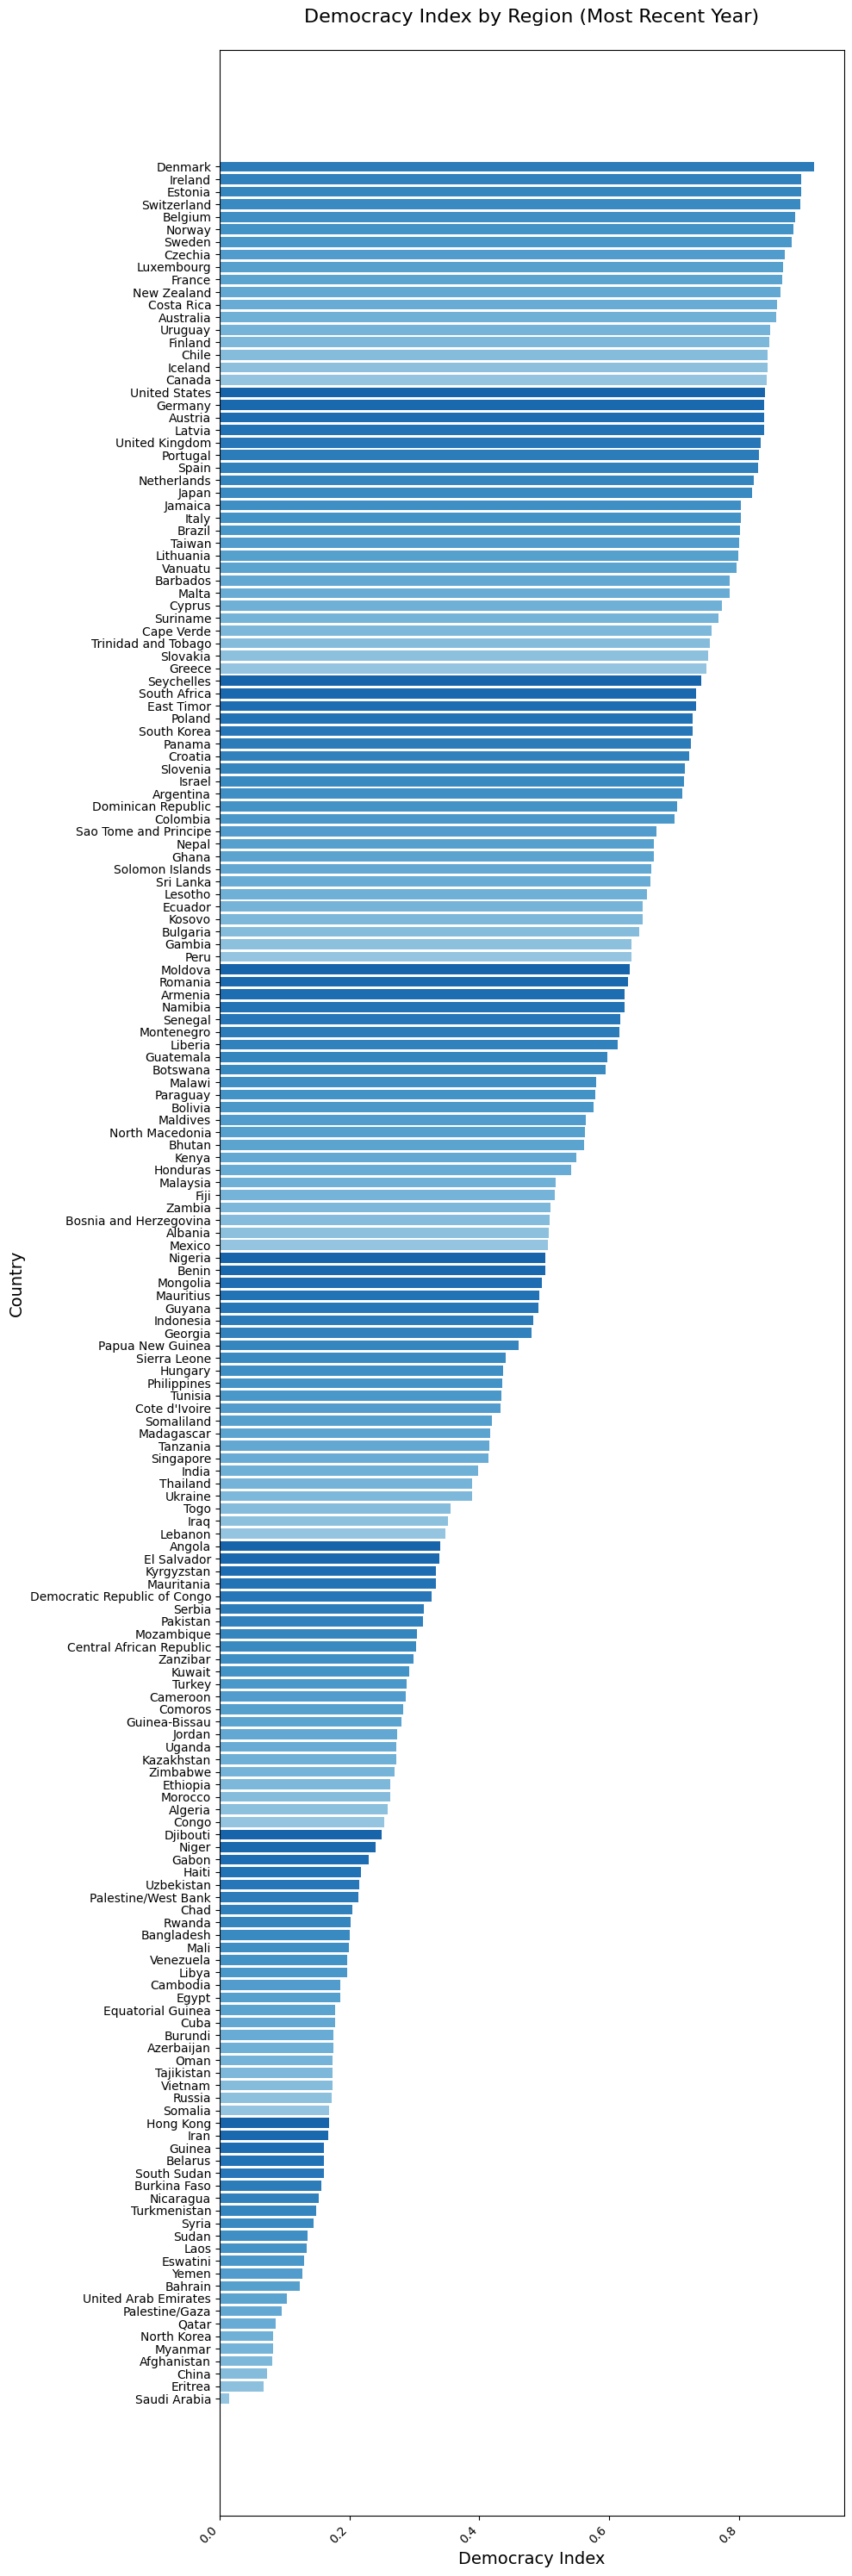

In [47]:
# Plot the bar chart - it's pretty much unreadable because there are just too many countries
# Assign different colors to each bar helps with readability
plt.figure(figsize=(10, 30))
plt.barh(df_countries_recent['Entity'], df_countries_recent['Electoral democracy index (best estimate, aggregate: average)'], color=colors)
plt.xlabel('Democracy Index', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Democracy Index by Region (Most Recent Year)\n', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as a PNG file with a transparent background
plt.savefig('images/democracy_index_by_country_coloured.png', transparent=True)
plt.show()

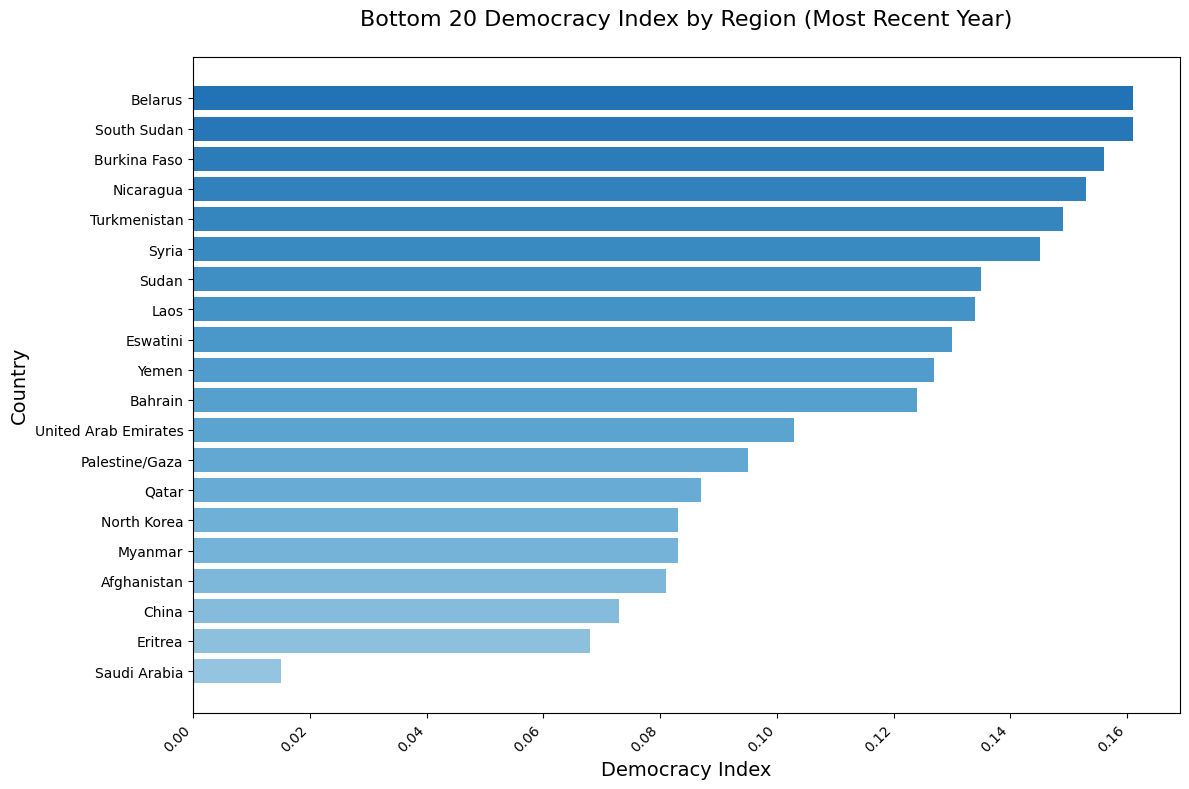

In [48]:
# Plot the bar chart - it's pretty much unreadable because there are just too many countries
# Assign different colors to each bar helps with readability

df_worst_20 = df_countries_recent[:20]
plt.figure(figsize=(12, 8))
plt.barh(df_worst_20['Entity'], 
         df_worst_20['Electoral democracy index (best estimate, aggregate: average)'], 
         color=colors)
plt.xlabel('Democracy Index', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Bottom 20 Democracy Index by Region (Most Recent Year)\n', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as a PNG file with a transparent background
plt.savefig('images/democracy_index_by_country_coloured.png', transparent=True)
plt.show()

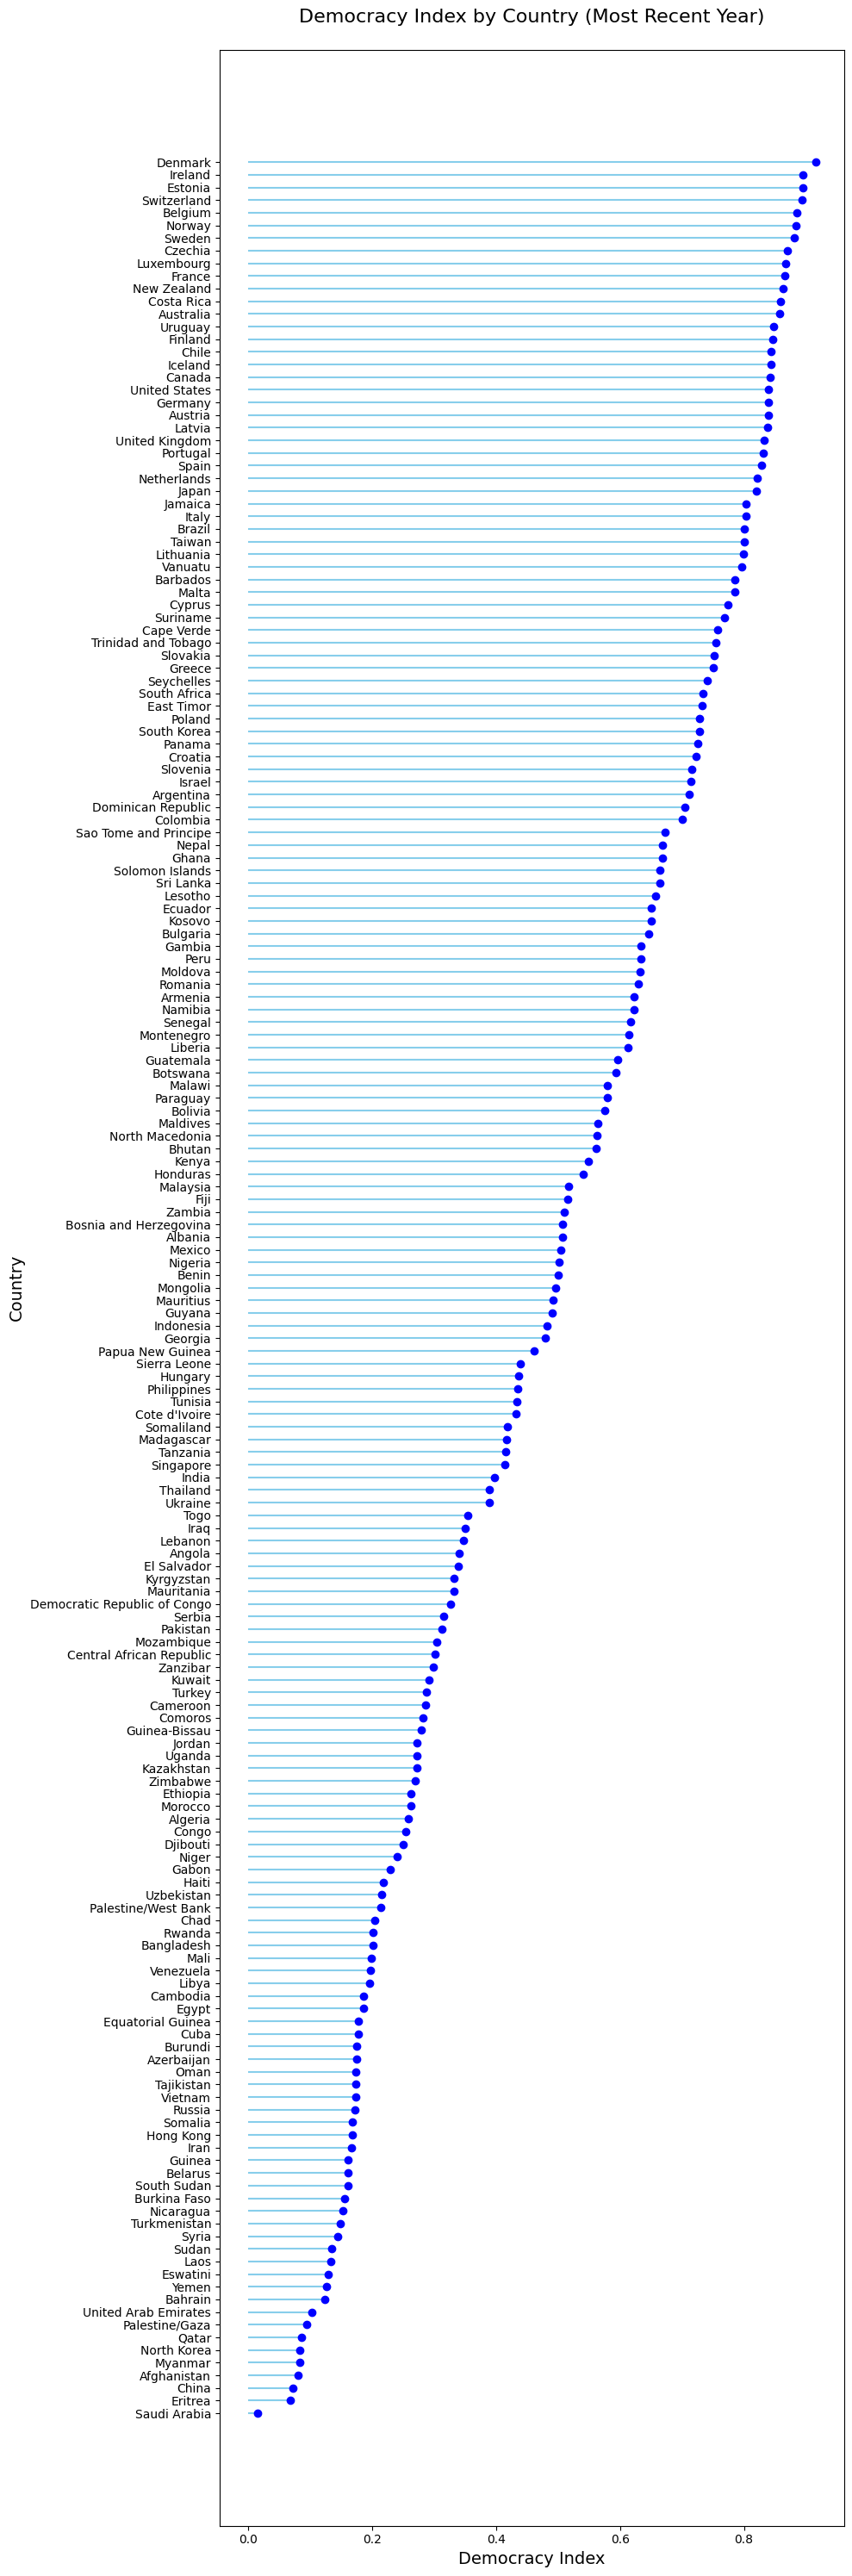

In [49]:
# Plot the bar chart - it's pretty much unreadable because there are just too many countries
# Create a lollipop chart
plt.figure(figsize=(10, 30))
plt.hlines(y=df_countries_recent['Entity'], 
           xmin=0, 
           xmax=df_countries_recent['Electoral democracy index (best estimate, aggregate: average)'], 
           color='skyblue')
plt.plot(df_countries_recent['Electoral democracy index (best estimate, aggregate: average)'], 
         df_countries_recent['Entity'], 
         "o", 
         color='blue')
plt.xlabel('Democracy Index', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Democracy Index by Country (Most Recent Year)\n', fontsize=16)
plt.tight_layout()

# Save the plot as a PNG file with a transparent background
plt.savefig('images/democracy_index_by_country_lollipop.png', transparent=True)
plt.show()

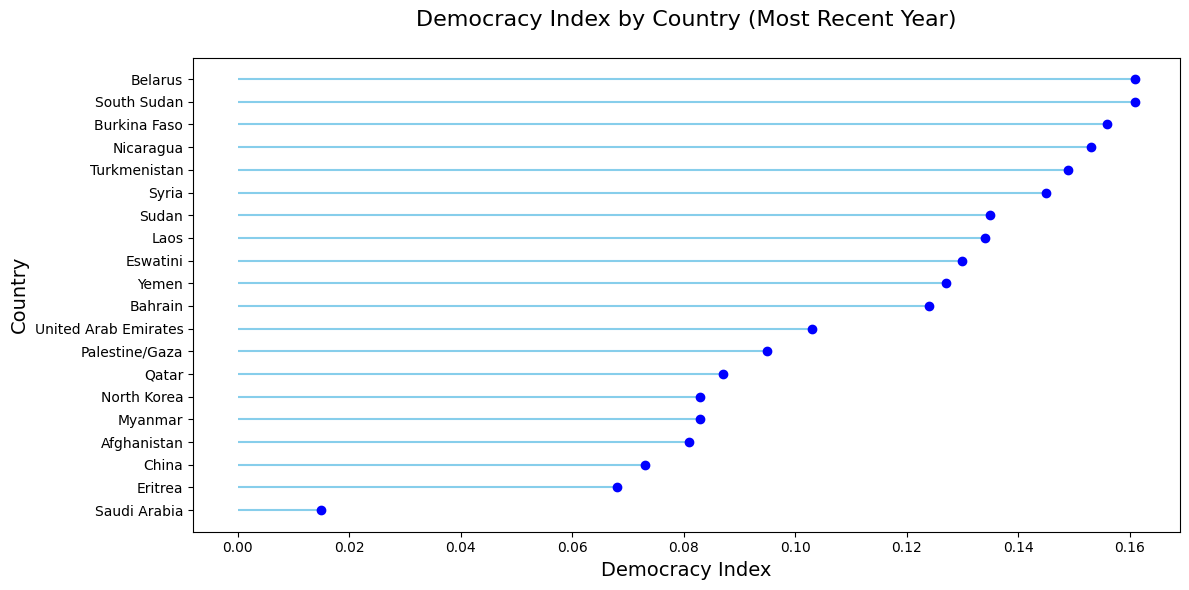

In [50]:
# Plot the bar chart - it's pretty much unreadable because there are just too many countries
# Create a lollipop chart
plt.figure(figsize=(12, 6))
plt.hlines(y=df_worst_20['Entity'], 
           xmin=0, 
           xmax=df_worst_20['Electoral democracy index (best estimate, aggregate: average)'], 
           color='skyblue')
plt.plot(df_worst_20['Electoral democracy index (best estimate, aggregate: average)'], 
         df_worst_20['Entity'], 
         "o", 
         color='blue')
plt.xlabel('Democracy Index', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Democracy Index by Country (Most Recent Year)\n', fontsize=16)
plt.tight_layout()

# Save the plot as a PNG file with a transparent background
plt.savefig('images/democracy_index_by_country_lollipop.png', transparent=True)
plt.show()

In [51]:

def plot_democracy_index(df, years, sample_countries, title='Change in Democracy Index Over Time'):
    """
    Plots the change in democracy index for the given sample countries over the specified years.

    Parameters:
    df (pd.DataFrame): The dataframe containing democracy index data.
    years (range): The range of years to filter the data.
    sample_countries (list): List of countries to include in the plot.

    Returns:
    None
    """
    # Filter data for the years of interest
    df_filtered_for_years = df[df['Year'].isin(years)]

    # Create a line chart to visualize the change in democracy over this period for sample countries
    plt.figure(figsize=(10, 6))
    for country in sample_countries:
        country_data = df_filtered_for_years[df_filtered_for_years['Entity'] == country]
        plt.plot(country_data['Year'], 
                 country_data['Electoral democracy index (best estimate, aggregate: average)'], 
                 label=country,
                 linewidth=2,
                 )

    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Democracy Index', fontsize=14)
    plt.title(f'{title}\n', fontsize=18)
    plt.legend(loc='best', frameon=False)
    plt.gca().spines['top'].set_color('lightgrey')
    plt.gca().spines['right'].set_color('lightgrey')
    plt.gca().spines['left'].set_color('lightgrey')
    plt.gca().spines['bottom'].set_color('lightgrey')

    # Set x-axis tick labels to integer only
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    plt.savefig(f'./images/{title}.png', transparent=True)
    plt.show()
    plt.close()

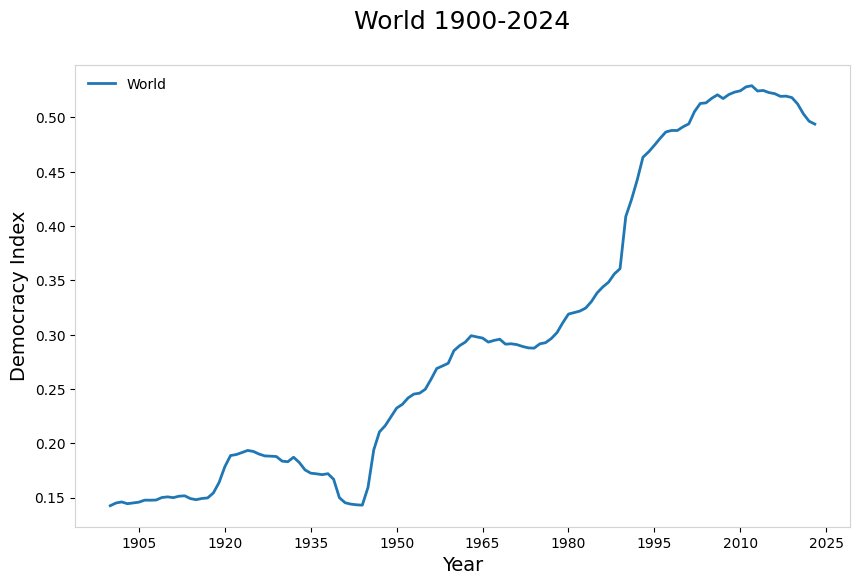

In [52]:
plot_democracy_index(df_regions, range(1900, 2024), ['World'], "World 1900-2024")

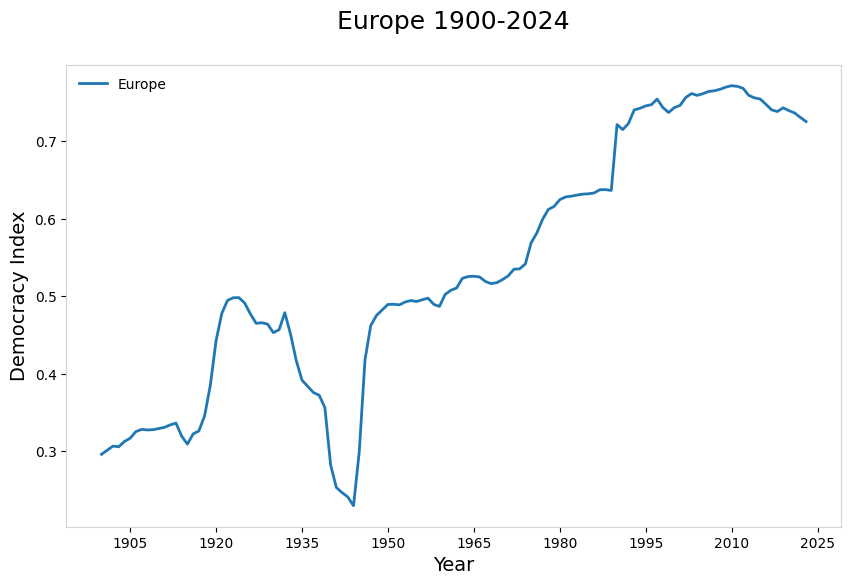

In [53]:
plot_democracy_index(df_regions, range(1900, 2024), ['Europe'], "Europe 1900-2024")

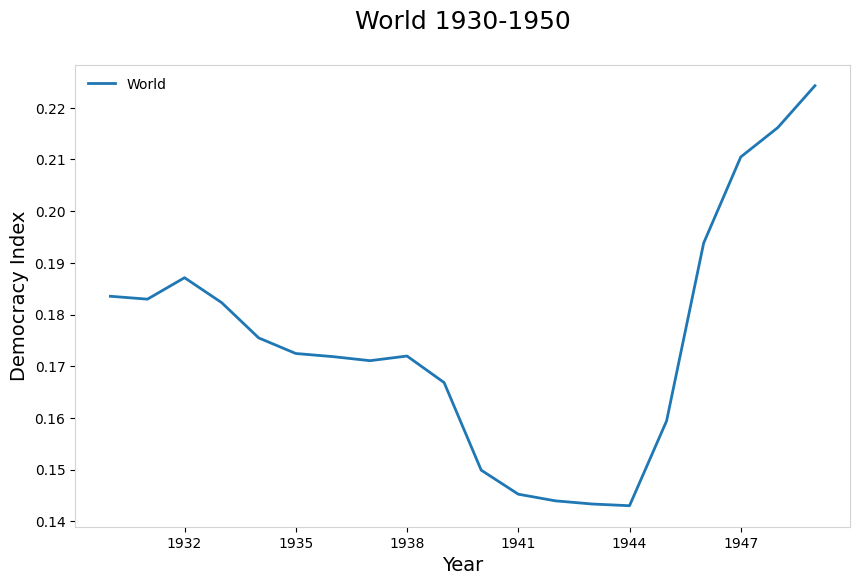

In [54]:
plot_democracy_index(df_regions, range(1930, 1950), ['World'], "World 1930-1950")

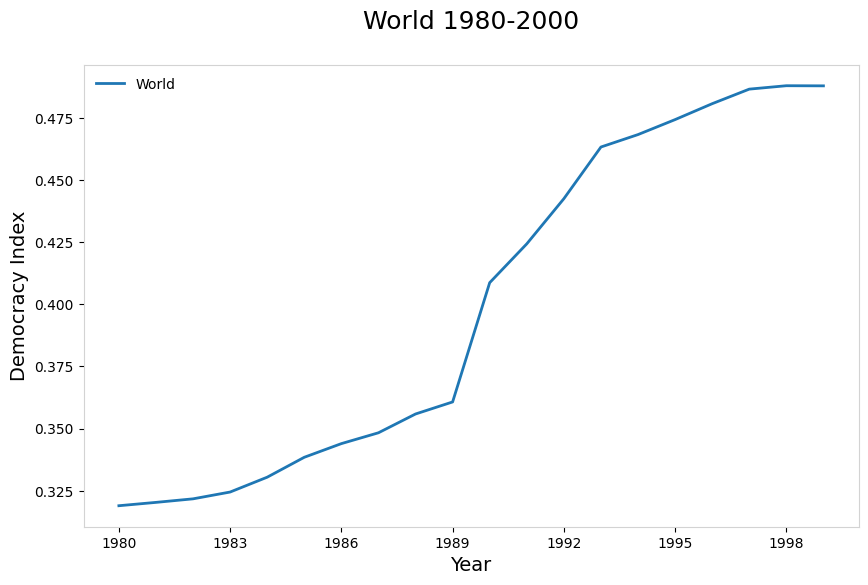

In [55]:
plot_democracy_index(df_regions, range(1980, 2000), ['World'], "World 1980-2000")

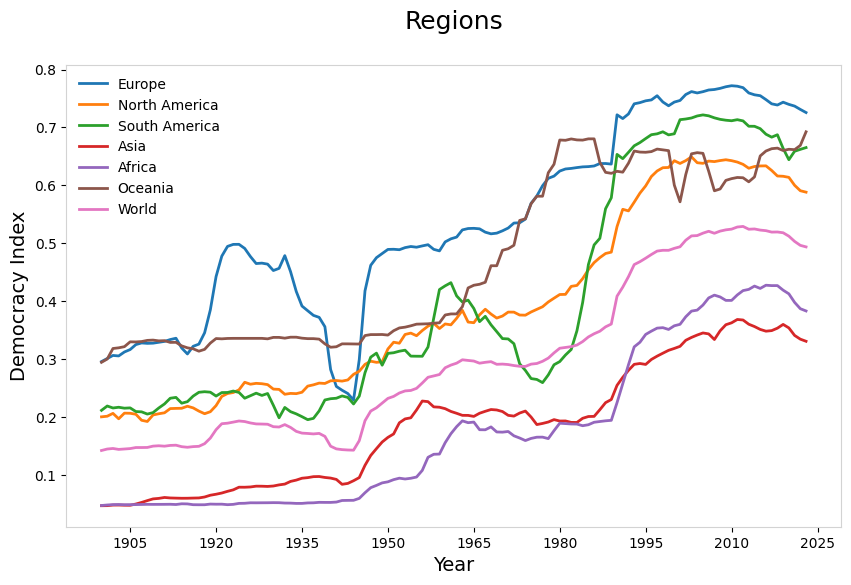

In [56]:
plot_democracy_index(df_regions, range(1900, 2024), regions, "Regions")

ww2

In [57]:
# Define a list of European countries and create a dataframe - not all
european_countries = [
    "Albania",
    "Andorra",
    "Austria",  
    "Belgium",
    "Bulgaria", 
    "Czechoslovakia",  
    "Denmark", 
    "Estonia", 
    "Finland",
    "France",
    "Germany",
    "Greece",
    "Hungary",
    "Iceland",  
    "Ireland",
    "Italy",
    "Latvia",
    "Liechtenstein",
    "Lithuania",
    "Luxembourg",
    "Monaco",
    "Netherlands",
    "Norway",
    "Poland",
    "Portugal",
    "Romania",
    "San Marino",
    "Spain",  # Just emerged from civil war under Franco
    "Sweden",
    "Switzerland",
    "United Kingdom",
    "Vatican City",
    "Yugoslavia"
]


# Filter the dataframe for European countries
df_europe = df_filtered[df_filtered['Entity'].isin(european_countries)]

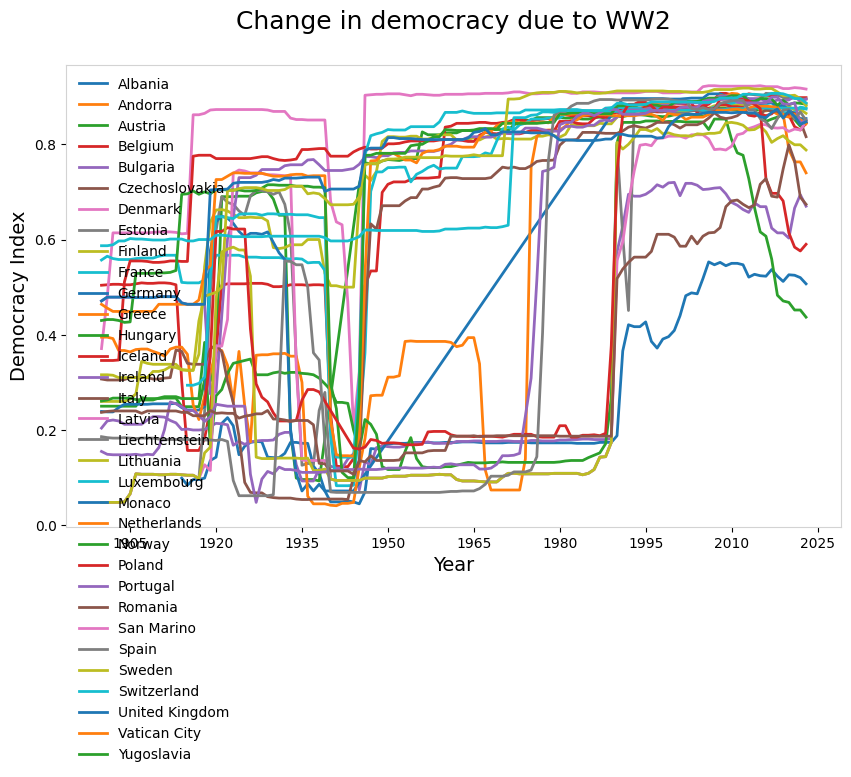

In [58]:
plot_democracy_index(df_europe, range(1900, 2024), european_countries, "Change in democracy due to WW2")

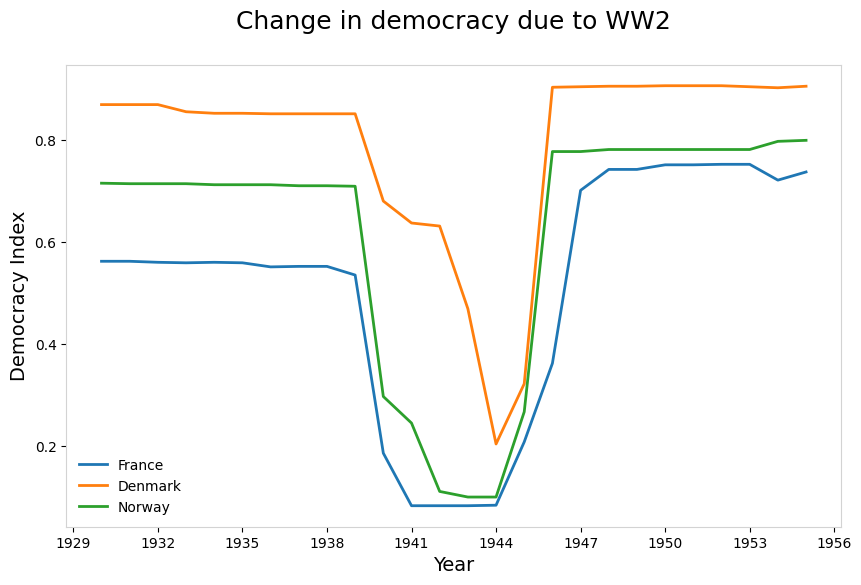

In [59]:
plot_democracy_index(df_europe, range(1930, 1956), ['France', 'Denmark', 'Norway'], "Change in democracy due to WW2")

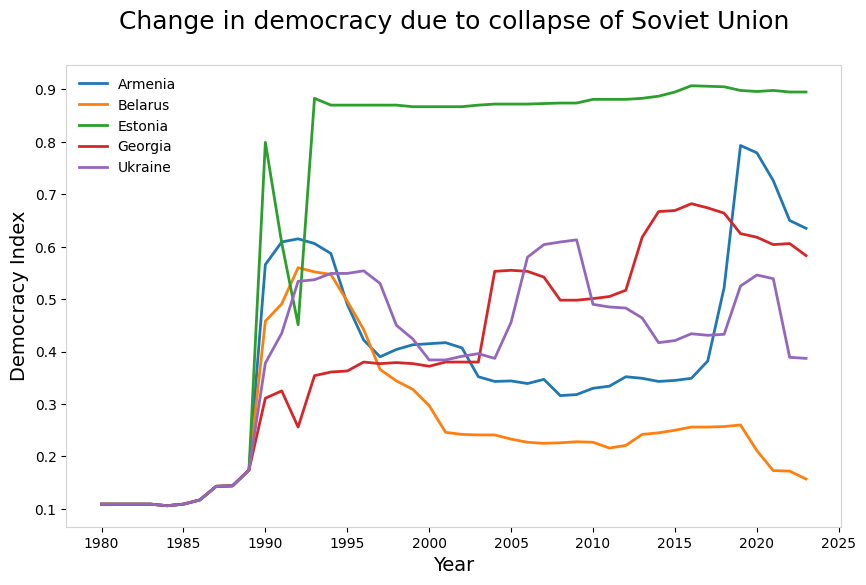

In [60]:
former_soviet_union_countries = [
    'Armenia', 'Azerbaijan', 'Belarus', 'Estonia', 'Georgia', 'Kazakhstan',
    'Kyrgyzstan', 'Latvia', 'Lithuania', 'Moldova', 'Russia', 'Tajikistan',
    'Turkmenistan', 'Ukraine', 'Uzbekistan'
]

# Filter the dataframe for ex Soviet union countries
df_ex_soviet_union= df_filtered[df_filtered['Entity'].isin(former_soviet_union_countries)]
years_of_interest = range(1980, 2024)
plot_democracy_index(df_ex_soviet_union, years_of_interest, ['Armenia', 'Belarus', 'Estonia', 'Georgia', 'Ukraine'], "Change in democracy due to collapse of Soviet Union")

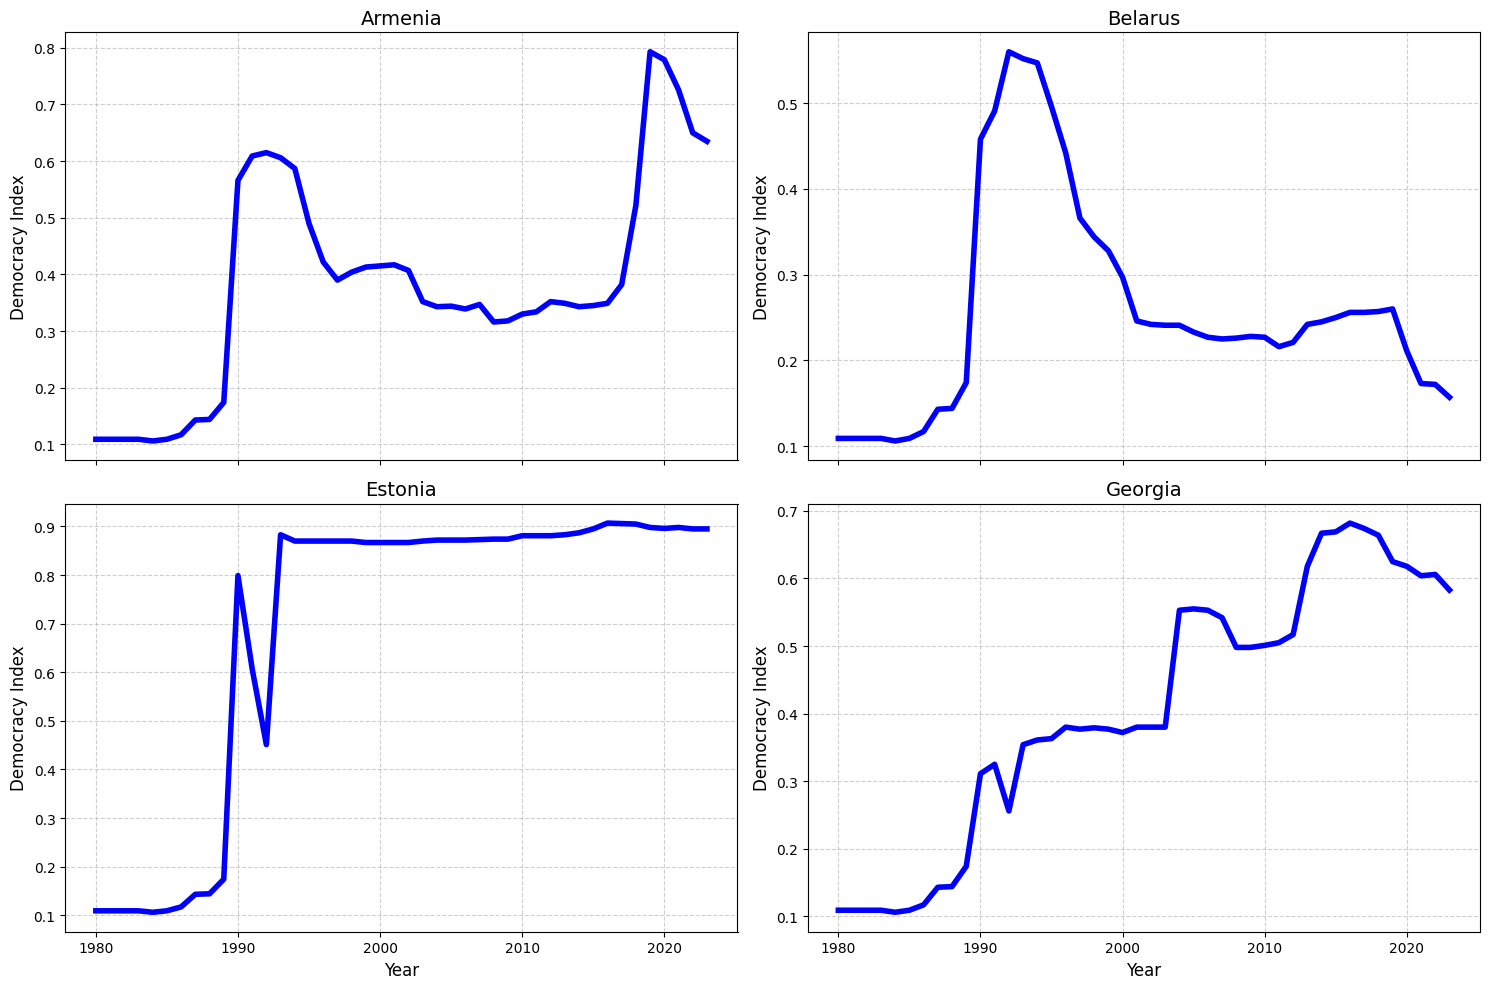

In [61]:
# Filter the dataframe for ex Soviet union countries
df_ex_soviet_union = df_filtered[df_filtered['Entity'].isin(former_soviet_union_countries)]
df_ex_soviet_union = df_ex_soviet_union[df_ex_soviet_union['Year'].isin(years_of_interest)]

# Create a 2x2 grid of subplots for the countries
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for ax, country in zip(axes, ['Armenia', 'Belarus', 'Estonia', 'Georgia']):
    country_data = df_ex_soviet_union[df_ex_soviet_union['Entity'] == country]
    ax.plot(country_data['Year'], 
            country_data['Electoral democracy index (best estimate, aggregate: average)'], 
            label=country, 
            linewidth=4, 
            color='blue')
    ax.set_title(country, fontsize=14)
    ax.set_ylabel('Democracy Index', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)

# Add xlabel to the bottom row
for ax in axes[-2:]:
    ax.set_xlabel('Year', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.savefig('images/democracy_index_collapse_soviet_union_2x2.png', transparent=True)
plt.show()